# ７層CNN Model for MNIST Data

In [1]:
# ライブラリのインポート
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# データセットの読み込みとデータの前処理

# MNISTデータセットの読み込み
(x_trains, y_trains), (x_tests, y_tests) = mnist.load_data()

# 訓練データ
# 60000x28x28の3次元配列を60000×28×28×1の4次元配列に変換
x_trains = x_trains.reshape(60000, 28, 28, 1)
x_trains = x_trains.astype('float32') # float32型に変換
x_trains /= 255                       # 0から1.0の範囲に変換
correct = 10                          # 正解ラベルの数
# 正解ラベルを1-of-K符号化法で変換
y_trains = np_utils.to_categorical(y_trains, correct)

# テストデータ
# 10000x28x28の3次元配列を10000×28×28×1の4次元配列に変換
x_tests = x_tests.reshape(10000, 28, 28, 1)
# テストデータをfloat32(浮動小数点数)型に変換
x_tests = x_tests.astype('float32') # float32型に変換
x_tests /= 255                      # 0から1.0の範囲に変換
# 正解ラベルをワンホット表現に変換
y_tests = np_utils.to_categorical(y_tests, correct)

In [3]:
# 畳み込みネットワークの構築

model = Sequential()                      # Sequentialオブジェクトの生成

# （第1層）畳み込み層1
# ニューロン数：16
# 出力：1ニューロンあたり(28, 28, 1)の3階テンソルを16個出力
model.add(Conv2D(filters=16,              # フィルターの数は16
                 kernel_size=(3, 3),      # 3×3のフィルターを使用
                 input_shape=(28, 28, 1), # 入力データのサイズ
                 padding='same',          # ゼロパディングを行う
                 activation='relu'        # 活性化関数はReLU
                ))

# （第2層）畳み込み層2
# ニューロン数：32
# 出力：1ニューロンあたり(28, 28, 1)の3階テンソルを32個出力
model.add(Conv2D(filters=32,              # フィルターの数は32
                 kernel_size=(3, 3),      # 3×3のフィルターを使用
                 padding='same',          # ゼロパディングを行う
                 activation='relu'        # 活性化関数はReLU
                ))

# （第3層）プーリング層1
# ユニット数：32
# 出力：1ユニットあたり(14, 14, 1)の3階テンソルを32個出力
model.add(
    MaxPooling2D(pool_size=(2, 2)))       # 縮小対象の領域は2×2

# （第4層）畳み込み層3
# ニューロン数：64
# 出力：1ニューロンあたり(14, 14, 1)の3階テンソルを64個出力
model.add(Conv2D(filters=64,              # フィルターの数は64
                 kernel_size=(3, 3),      # 3×3のフィルターを使用
                 padding='same',          # ゼロパディングを行う
                 activation='relu'        # 活性化関数はReLU
                ))

# （第5層）プーリング層2
# 出力：1ユニットあたり(7, 7, 1)の3階テンソルを64個出力
model.add(
    MaxPooling2D(pool_size=(2, 2)))       # 縮小対象の領域は2×2

# ドロップアウト層
# 出力：1ユニットあたり(7, 7, 1)の3階テンソルを64個出力
model.add(Dropout(0.5))                   # ドロップアウトは50％

# Flaten層
# ニューロン数＝7×7×64）
# 画像の枚数, 7（タテ）,7（ヨコ）,64（チャンネル）)を
# 画像の枚数, 7×7×64=3136)の2階テンソルに変換
model.add(Flatten())

# （第6層）全結合層
# ニューロン数：128
# 出力：要素数(128)の1階テンソルを出力
model.add(Dense(128,                      # ニューロン数は128
                activation='relu'         # 活性化関数はReLU
               ))

# （第7層）出力層
# ニューロン数：10
# 出力：要素数(10)の1階テンソルを出力
model.add(Dense(10,                       # 出力層のニューロン数は10
                activation='softmax'      # 活性化関数はソフトマックス
               ))

# Sequentialオブジェクトのコンパイル
model.compile(
    loss='categorical_crossentropy',      # 損失の基準は交差エントロピー誤差
    optimizer=Adam(),                     # 学習方法をAdamにする
    metrics=['accuracy']                  # 学習評価として正解率を指定
    )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [4]:
history = model.ﬁt(x_trains,            # 訓練データ
                   y_trains,            # 正解ラベル 
                   batch_size=100,      # 勾配計算に用いるミニバッチの数 
                   epochs=10,           # 学習を繰り返す回数
                   verbose=1,           # 学習の進捗状況を出力する
                   validation_data=(
                       x_tests, y_tests # テストデータの指定
                   ))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1855 - accuracy: 0.9405 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 2/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0630 - accuracy: 0.9799 - val_loss: 0.0351 - val_accuracy: 0.9881
Epoch 3/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0289 - val_accuracy: 0.9903
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0378 - accuracy: 0.9878 - val_loss: 0.0235 - val_accuracy: 0.9923
Epoch 5/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0252 - val_accuracy: 0.9914
Epoch 6/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0211 - val_accuracy: 0.9929
Epoch 7/10
60000/60000 [==============================] - 72s 1ms/st

In [6]:
history.history

{'val_loss': [0.04541851042886265,
  0.0350535661415779,
  0.028875780573434894,
  0.023452965333199245,
  0.025239722740043363,
  0.021147053418717407,
  0.020114250648712185,
  0.021123537664425384,
  0.021183692498761956,
  0.0206985355033612],
 'val_accuracy': [0.9851999878883362,
  0.988099992275238,
  0.9902999997138977,
  0.9922999739646912,
  0.9914000034332275,
  0.992900013923645,
  0.9930999875068665,
  0.9922000169754028,
  0.9921000003814697,
  0.9927999973297119],
 'loss': [0.18547972789189468,
  0.06295958870051739,
  0.04669975344402095,
  0.03780278093453186,
  0.03161113349483154,
  0.02748500140189814,
  0.02469783283197709,
  0.021741359210330605,
  0.01980648759410542,
  0.018471224101813278],
 'accuracy': [0.94051665,
  0.9799333,
  0.9851,
  0.9877833,
  0.9895667,
  0.99118334,
  0.99261665,
  0.99305,
  0.9932167,
  0.99405]}

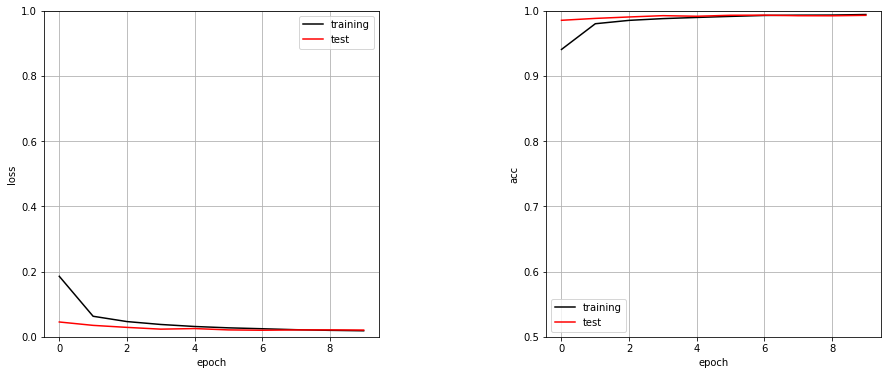

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# プロット図のサイズを設定
plt.ﬁgure(ﬁgsize=(15, 6))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.5)

# 1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1, 2, 1)
# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル

# 1×2のグリッドの右(1,2,21)の領域にプロット
plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(history.history['accuracy'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_accuracy'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()